In [6]:
import numpy as np
import matplotlib.pyplot as plt

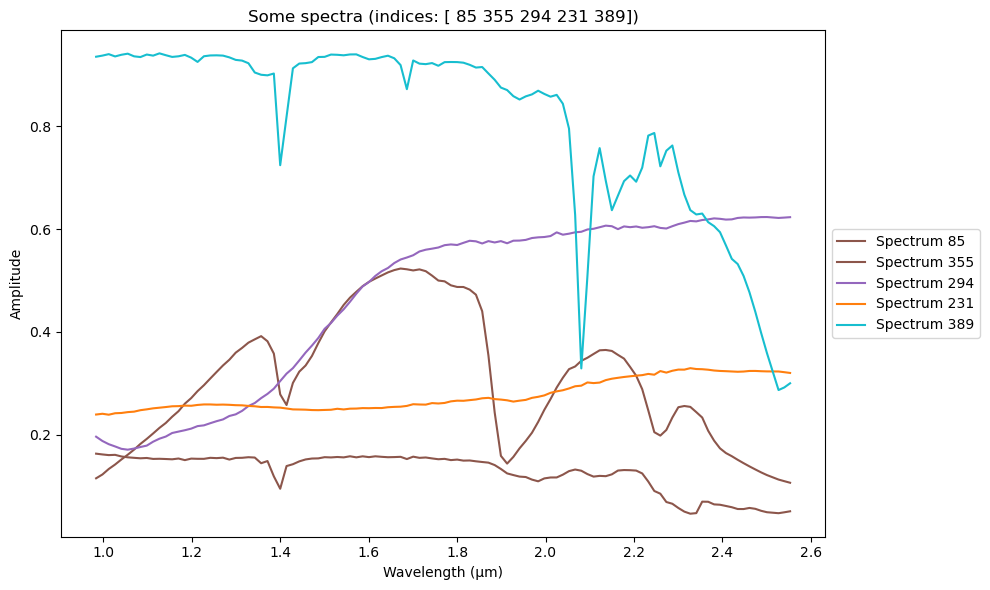

In [8]:
import load_A 

In [9]:
A, N, P, wavelengths=load_A .load_dict_A()

In [12]:
print('the number of points for a spectrum:',N)
print('The number of spectra:',P)

the number of points for a spectrum: 113
The number of spectra: 410


In [16]:
def generate_data_cube(A, image_height, image_width, sigma_noise,l1,c1,c2,c3,c4,t3,l4,r,l):
    """
    Generates a hyperspectral cube with geometric shapes

    Params:
       image_height (int): height of the generated image
       image_width (int): width of the generated image
       sigma_noise (array od shape image_height*image_width): noise added to image
       l1 (list of 2 integers): start point of the square
       c1 (list of 2 integers): centroid of the square
       c2 (list of 2 integers): center of the circle
       c3 (list of 2 integers): center of the traingle
       c4 (list of 2 integers): center of the diamond
       t3 (list of 2 integers): start point of the triangle
       l4 (list of 2 integers): start point of the diamond
       r (int): circle radius
       l (int): diagonal length of the diamond 
       
    returns 
        data: a tensor of shape (image_height, image_width, spectral bands)
        abundances (
        B (array of shape (spectral bands,4)): truncated dictionnary for the selected endmembers

    """

    N, P = A.shape[0],4 # P number of selected endmembers, N the number of wavelengths
    B=A[:,[0,1,2,3]]
    data_cube = np.zeros(( image_height, image_width,N))
    abundances_cube = np.zeros(( image_height, image_width,P))
    k=5
    
    #carré
    abundances_cube[l1[0]:2*c1[0], l1[1]:2*c1[1],0] =1
    for i in range(image_height):
        for j in range(image_width):
            if i>c1[0] or j>c1[1] or i<l1[0] or j<l1[1] :
                abundances_cube[i,j,0]=abs(np.sqrt((image_height-c1[0])**2+(image_width-c1[1])**2)-np.sqrt((i-c1[0])**2+(j-c1[1])**2))

    
    x, y = np.meshgrid(np.arange(image_height), np.arange(image_width))
    circle = (x - c2[0])**2 + (y - c2[1])**2 < r**2
    abundances_cube[circle, 1] = 1
    for i in range(image_height):
        for j in range(image_width):
            if circle[i,j]==False:
                abundances_cube[i,j,1]=abs(np.sqrt((image_height-c2[0])**2+(image_width-c2[1])**2)-np.sqrt((i-c2[0])**2+(j-c2[1])**2))



    
    #triangle
    for j in range(image_height):
        for k in range(image_width):
            if j >= t3[0] and k >= t3[0] and k <= t3[1] - (j - t3[0]):
                abundances_cube[j, k, 2] = 1
            else:
                abundances_cube[j,k,2]=abs(np.sqrt((0-c3[0])**2+(0-c3[1])**2)-np.sqrt((j-c3[0])**2+(k-c3[1])**2))

 # Création du losange
    for j in range(l4[0], l4[1]):  
        for k in range(l4[2], l4[3]):  
            if abs(j - c4[0]) + abs(k - c4[1]) <= l:
                abundances_cube[j, k, 3] = 1
    for j in range(image_height):
        for k in range(image_width):
            if abundances_cube[j, k, 3]!= 1:
                abundances_cube[j,k,3]=abs(np.sqrt((0-c4[0])**2+(image_width-c4[1])**2)-np.sqrt((j-c4[0])**2+(k-c4[1])**2))
    s=abundances_cube[:,:,0]+abundances_cube[:,:,1]+abundances_cube[:,:,2]+abundances_cube[:,:,3]
    
    for spec in [0,1,2,3]:
        abundances_cube[:,:,spec]=abundances_cube[:,:,spec]/s
        
    
    for i in range(image_height):
        for j in range(image_width):
            
            data_cube[ i, j,:] = np.dot(B, abundances_cube[i, j,:])
            data_cube[i, j,:] += sigma_noise[i,j]

    return data_cube.T, abundances_cube,B

In [18]:
l1=[170,170]
c1=[250,250]
c2=[250,70]
t3=[30,130]
c3=[75,55]
c4=[200,80]
r=45
l4=[120, 281,0, 161]
l=65

In [ ]:
data, abundances,B =generate_data_cube3(A, image_height, image_width, sigma_noise,l1,c1,c2,c3,c4,t3,l4,r,l)